In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
datos01 = np.array([[0.8, 10000], [2.3, 15000], [3.7, 40000], [7.1,80000], [7.2, 90000]])

In [4]:
datos01[2:4,:] # Muestreme las columnas de las filas 2 a la fila 4 (sin incluir la 4)

array([[3.7e+00, 4.0e+04],
       [7.1e+00, 8.0e+04]])

In [5]:
datos01[4,1] # Muestre el dato de la fila 4 y la columna 1

90000.0

In [6]:
datos01[:, 1] # Muestre las filas de la columna 1

array([10000., 15000., 40000., 80000., 90000.])

In [7]:
datos01[1,:] # Muestre las columnas de la fila 1

array([2.3e+00, 1.5e+04])

In [8]:
# Polinomio de Newton

x = Symbol('x')

P0 = datos01[0,1]

c1 = (datos01[1,1]-datos01[0,1])/((datos01[1,0]-datos01[0,0]))
P1 = P0 + c1*(x-datos01[0,0])
P1_np = lambdify(x, P1, 'numpy')

c2 = (datos01[2,1] - P1_np(datos01[2,0]))/((datos01[2,0]-datos01[0,0])*(datos01[2,0]-datos01[1,0]))
P2 = P1 + c2*(x-datos01[0,0])*(x-datos01[1,0])
P2_np = lambdify(x, P2, 'numpy')

c3 = (datos01[3,1] - P2_np(datos01[3,0]))/((datos01[3,0]-datos01[0,0])*(datos01[3,0]-datos01[1,0])*(datos01[3,0]-datos01[2,0]))
P3 = P2 + c3*(x-datos01[0,0])*(x-datos01[1,0])*(x-datos01[2,0])
P3_np = lambdify(x, P3, 'numpy')

c4 = (datos01[4,1] - P3_np(datos01[4,0]))/((datos01[4,0]-datos01[0,0])*(datos01[4,0]-datos01[1,0])*(datos01[4,0]-datos01[2,0])*(datos01[4,0]-datos01[3,0]))
P4 = P3 + c4*(x-datos01[0,0])*(x-datos01[1,0])*(x-datos01[2,0])*(x-datos01[3,0])
P4_np = lambdify(x, P4, 'numpy')

P4_np(datos01[:,0])

array([10000., 15000., 40000., 80000., 90000.])

<module 'matplotlib.pyplot' from 'd:\\Python\\Lib\\site-packages\\matplotlib\\pyplot.py'>

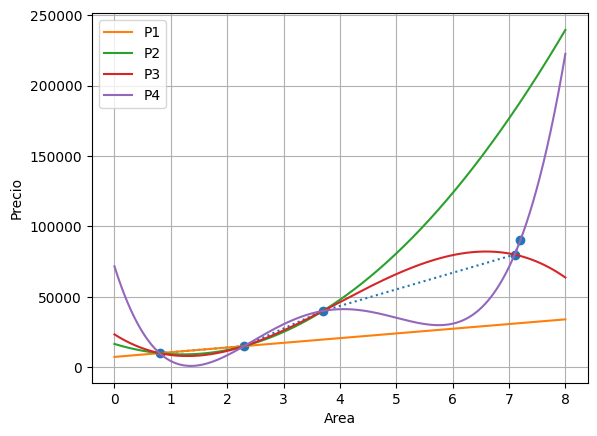

In [9]:
t=np.linspace(0, 8, 10000)
figura01 = plt.figure()
plt.plot(datos01[:,0], datos01[:,1], 'o:')
plt.plot(t, P1_np(t), label="P1")
plt.plot(t, P2_np(t), label="P2")
plt.plot(t, P3_np(t), label="P3")
plt.plot(t, P4_np(t), label="P4")
plt.xlabel("Area")
plt.ylabel("Precio")
plt.grid()
plt.legend()
plt

In [10]:
print(P1_np(3.5))
print(P2_np(3.5))
print(P3_np(3.5))
print(P4_np(3.5))

18999.999999999985
35226.60098522169
35872.28339611708
38205.218540618225
